# 분류 (Classification)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# 결측치 처리 함수
def fillna_nan(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  return df

# 레이블 인코딩
def label_encoding_features(df):
  features = ['Sex', 'Embarked']
  for feature in features :
    encoder = LabelEncoder()
    df[feature] = encoder.fit_transform(df[feature])
  return df

# 모델에게 불필요한 특성(feature) 제거
def drop_feature(df):
  df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
  return df

# 최종적으로 전처리를 수행할 함수
def transform_features(df):
  df = fillna_nan(df)
  df = drop_feature(df)
  df = label_encoding_features(df)
  return df

In [ ]:
# 데이터 로딩
titanic_df = pd.read_csv('./titanic_train.csv')

# target (label) 데이터
y_titanic = titanic_df['Survived']

# feature 데이터
X_titanic = titanic_df.drop('Survived', axis=1)

# feature 전처리
X_titanic_df = transform_features(X_titanic)

X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,3
3,1,0,35.0,1,0,53.1000,3
4,3,1,35.0,0,0,8.0500,3


In [ ]:
X_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


## KNN 알고리즘

In [ ]:
'''
# KNN (K-Nearest-Neighbors) : K 개의 가까운 이웃
 - 새로운 데이터가 주어지면 기존의 데이터 중에서 가장 속성이 비슷한 K개의 이웃을 먼저 찾음.
 - 가까운 이웃들이 갖고 있는 목표값과 같은 값으로 분류하여 예측하는 알고리즘
 - 이 K값에 따라 예측의 정확도가 달라지므로, 적절한 K값을 찾는 것이 관건
'''

In [ ]:
# 학습 세트, 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic, test_size=0.2, random_state=11)

In [ ]:
# 학습(KNN) / 예측 / 평가
from sklearn.neighbors import KNeighborsClassifier

# 객체 생성
knn = KNeighborsClassifier(n_neighbors=5)

# 학습
knn.fit(X_train, y_train)

# 예측 (분류)
pred = knn.predict(X_test)

print(pred[0:10])
print('-'*40)
print(y_test.values[0:10])

[1 0 0 0 1 1 0 1 0 1]
----------------------------------------
[1 1 0 0 0 0 0 1 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix

knn_matrix = confusion_matrix(y_test, pred)
knn_matrix

array([[96, 22],
       [28, 33]])

In [ ]:
# 평가지표
from sklearn.metrics import classification_report
knn_report = classification_report(y_test, pred)

print(knn_report)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       118
           1       0.60      0.54      0.57        61

    accuracy                           0.72       179
   macro avg       0.69      0.68      0.68       179
weighted avg       0.71      0.72      0.72       179



## SVM 알고리즘

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')

# kernel : 데이터를 벡터 공간으로 매핑하는 함수
#  - rbf(radial basic function), Linear, Polynimal, Sigmoid
svm_model.fit(X_train, y_train)

pred = svm_model.predict(X_test)

In [ ]:
# 평가
svm_matrix = confusion_matrix(y_test, pred)
print(svm_matrix)
print('-'*40)
print(classification_report(y_test, pred))

[[110   8]
 [ 42  19]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       118
           1       0.70      0.31      0.43        61

    accuracy                           0.72       179
   macro avg       0.71      0.62      0.62       179
weighted avg       0.72      0.72      0.68       179



## Decision Tree 알고리즘

In [ ]:
'''
# 결정 트리 (의사 결정 나무)
# 자료구조 중 트리 구조를 사용하고, 각 분기점(node)에 분석 대상의 속성(독립변수)를 위치.
# 각 분기점마다 목표값을 가장 잘 분류할 수 있는 속성을 찾아서 배치하고,
  해당 속성이 갖는 값을 이용하여 새로운 가지(brach)를 만들어 가는 방식

# 결정트리 성능을 결정하는 것은 균일한 세트가 필요
# 균일도를 측정하는 대표적인 방법
 - 엔트로피
 - 지니계수

'''

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
# 정확해지려면 max_depth가 많으면 된다. 그러나 너무 깊어지면 과대적합이 일어날 수 있음에 유의
# 적절한 깊이, 가지 수 등을 찾는 것이 중요

tree_model.fit(X_train, y_train)

pred = tree_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, pred))
print('-'*40)
print(classification_report(y_test, pred))

[[108  10]
 [ 14  47]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       118
           1       0.82      0.77      0.80        61

    accuracy                           0.87       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.87      0.86       179



### **[결정 트리 모델 시각화]**

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
# graphviz pydot

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

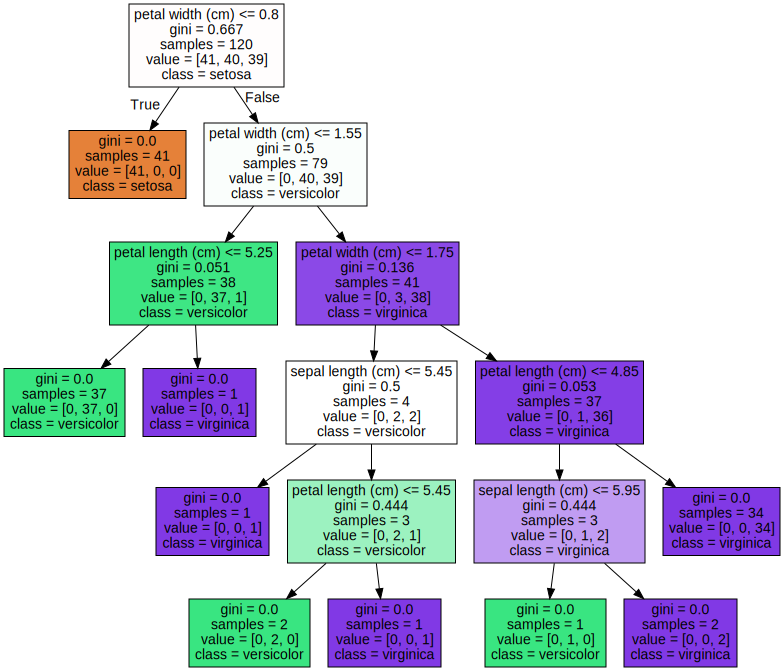

In [ ]:
# out_file을 읽어들여서 notebook 화면에 시각화
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

### 랜덤포레스트 알고리즘

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)

rf_clf = RandomForestClassifier(random_state=11)

rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

